In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense, Dropout
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [ ]:
from pandas import DataFrame
from pandas import Series
from pandas import concat
from pandas import read_csv
from pandas import datetime
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.layers import LSTM, GRU
from keras import regularizers
from math import sqrt
from matplotlib import pyplot
import matplotlib.pyplot as plt
from numpy import concatenate
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn import metrics
from keras import optimizers
from keras.layers import LeakyReLU
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from sklearn.svm import SVR
from sklearn.multioutput import MultiOutputRegressor
from sklearn import metrics
from keras.callbacks import LambdaCallback
#from pandas.tools.plotting import table
from sklearn.model_selection import RandomizedSearchCV
from numpy import mean
from keras.layers import Bidirectional
from keras.wrappers.scikit_learn import KerasClassifier
from keras.layers import Concatenate, Input
from keras.layers import TimeDistributed
from keras.layers import add
from keras.layers import merge

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  """


In [ ]:
from google.colab import files
uploaded=files.upload()

In [ ]:
import numpy as np
import tensorflow as tf
import random as rn
import keras
import os
import pandas as pd

In [ ]:
data1=pd.read_csv('/content/station1mv.csv')

In [ ]:
data1['ini_albedo_1h'].fillna(0, inplace=True)

In [ ]:
index = pd.to_datetime(data1['time'])
df = data1.set_index(index)

In [ ]:
df

,Unnamed: 0,time,lon,lat,ini_albedo_1h,ini_skint_1h,ini_aod55_1h,ini_aod84_1h,ini_surfpress_1h,ini_ozone_1h,GHI
time,,,,,,,,,,,
2019-01-01 00:00:00,0,2019-01-01 00:00:00,80.5,12.5,0.000000,293.03680,0.142760,0.1019,1016.0,240.025,0.0
2019-01-01 01:00:00,1,2019-01-01 01:00:00,80.5,12.5,0.061367,295.26462,0.142956,0.1021,1016.0,240.025,0.0
2019-01-01 02:00:00,2,2019-01-01 02:00:00,80.5,12.5,0.049194,298.47100,0.148692,0.1046,1016.0,240.025,0.0
2019-01-01 03:00:00,3,2019-01-01 03:00:00,80.5,12.5,0.046654,301.59620,0.157420,0.1102,1016.0,240.025,0.0
2019-01-01 04:00:00,4,2019-01-01 04:00:00,80.5,12.5,0.043536,303.47116,0.168884,0.1177,1016.0,240.025,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2019-12-31 19:00:00,8755,2019-12-31 19:00:00,80.5,12.5,0.000000,296.85327,0.452462,0.3008,1012.0,257.050,0.0
2019-12-31 20:00:00,8756,2019-12-31 20:00:00,80.5,12.5,0.000000,296.72305,0.404362,0.2701,1012.0,255.975,0.0
2019-12-31 21:00:00,8757,2019-12-31 21:00:00,80.5,12.5,0.000000,296.76570,0.349030,0.2343,1012.0,254.925,0.0


In [ ]:
# transform a time series dataset into a supervised learning dataset
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    '''input:  data => pandas series'''
    df_temp = pd.DataFrame(data)
    cols = list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df_temp.shift(i))
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df_temp.shift(-i))
    # put it all together
    agg = pd.concat(cols, axis=1)
# drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    
    return agg.values

In [ ]:
window=series_to_supervised(df['GHI'],n_in=5,n_out=5)

In [ ]:
window1=series_to_supervised(df['ini_aod84_1h'],n_in=5,n_out=5)

In [ ]:
window3=series_to_supervised(df['ini_aod84_1h'],n_in=10,n_out=5)
window4=series_to_supervised(df['GHI'],n_in=10,n_out=5)

In [ ]:
window5=series_to_supervised(df['ini_aod84_1h'],n_in=30,n_out=5)
window6=series_to_supervised(df['GHI'],n_in=30,n_out=5)

In [ ]:
window7=series_to_supervised(df['ini_aod55_1h'],n_in=30,n_out=5)
#window6=series_to_supervised(df['GHI'],n_in=30,n_out=5)

In [ ]:
data_columns=['GHI(D-5)','GHI(D-4)','GHI(D-3)','GHI(D-2)','GHI(D-1)','GHI(D)','GHI(D+1)','GHI(D+2)','GHI(D+3)','GHI(D+4)']

In [ ]:
data_columns2=['AOD(D-5)','AOD(D-4)','AOD(D-3)','AOD(D-2)','AOD(D-1)','AOD(D)','AOD(D+1)','AOD(D+2)','AOD(D+3)','AOD(D+4)']

In [ ]:
data_columns3=['AOD(D-10)','AOD(D-9)','AOD(D-8)','AOD(D-7)','AOD(D-6)','AOD(D-5)','AOD(D-4)','AOD(D-3)','AOD(D-2)','AOD(D-1)','AOD(D)','AOD(D+1)','AOD(D+2)','AOD(D+3)','AOD(D+4)']
data_columns4=['GHI(D-10)','GHI(D-9)','GHI(D-8)','GHI(D-7)','GHI(D-6)','GHI(D-5)','GHI(D-4)','GHI(D-3)','GHI(D-2)','GHI(D-1)','GHI(D)','GHI(D+1)','GHI(D+2)','GHI(D+3)','GHI(D+4)']

In [ ]:
data_columns5_84=['AOD(D-30)','AOD(D-29)','AOD(D-28)','AOD(D-27)','AOD(D-26)','AOD(D-25)','AOD(D-24)','AOD(D-23)','AOD(D-22)','AOD(D-21)','AOD(D-20)','AOD(D-19)','AOD(D-18)','AOD(D-17)','AOD(D-16)','AOD(D-15)','AOD(D-14)','AOD(D-13)','AOD(D-12)','AOD(D-11)','AOD(D-10)','AOD(D-9)','AOD(D-8)','AOD(D-7)','AOD(D-6)','AOD(D-5)','AOD(D-4)','AOD(D-3)','AOD(D-2)','AOD(D-1)','AOD(D)','AOD(D+1)','AOD(D+2)','AOD(D+3)','AOD(D+4)']
data_columns5_55=['AOD5(D-30)','AOD5(D-29)','AOD5(D-28)','AOD5(D-27)','AOD5(D-26)','AOD5(D-25)','AOD5(D-24)','AOD5(D-23)','AOD5(D-22)','AOD5(D-21)','AOD5(D-20)','AOD5(D-19)','AOD5(D-18)','AOD5(D-17)','AOD5(D-16)','AOD5(D-15)','AOD5(D-14)','AOD5(D-13)','AOD5(D-12)','AOD5(D-11)','AOD5(D-10)','AOD5(D-9)','AOD5(D-8)','AOD5(D-7)','AOD5(D-6)','AOD5(D-5)','AOD5(D-4)','AOD5(D-3)','AOD5(D-2)','AOD5(D-1)','AOD5(D)','AOD5(D+1)','AOD5(D+2)','AOD5(D+3)','AOD5(D+4)']

data_columns6=['GHI(D-30)','GHI(D-29)','GHI(D-28)','GHI(D-27)','GHI(D-26)','GHI(D-25)','GHI(D-24)','GHI(D-23)','GHI(D-22)','GHI(D-21)','GHI(D-20)','GHI(D-19)','GHI(D-18)','GHI(D-17)','GHI(D-16)','GHI(D-15)','GHI(D-14)','GHI(D-13)','GHI(D-12)','GHI(D-11)','GHI(D-10)','GHI(D-9)','GHI(D-8)','GHI(D-7)','GHI(D-6)','GHI(D-5)','GHI(D-4)','GHI(D-3)','GHI(D-2)','GHI(D-1)','GHI(D)','GHI(D+1)','GHI(D+2)','GHI(D+3)','GHI(D+4)']

In [ ]:
data_column10=['st(D-30)','st(D-29)','st(D-28)','st(D-27)','st(D-26)','st(D-25)','st(D-24)','st(D-23)','st(D-22)','st(D-21)','st(D-20)','st(D-19)','st(D-18)','st(D-17)','st(D-16)','st(D-15)','st(D-14)','st(D-13)','st(D-12)','st(D-11)','st(D-10)','st(D-9)','st(D-8)','st(D-7)','st(D-6)','st(D-5)','st(D-4)','st(D-3)','st(D-2)','st(D-1)','st(D)','st(D+1)','st(D+2)','st(D+3)','st(D+4)']
data_column11=['s.a(D-30)','s.a(D-29)','s.a(D-28)','s.a(D-27)','s.a(D-26)','s.a(D-25)','s.a(D-24)','s.a(D-23)','s.a(D-22)','s.a(D-21)','s.a(D-20)','s.a(D-19)','s.a(D-18)','s.a(D-17)','s.a(D-16)','s.a(D-15)','s.a(D-14)','s.a(D-13)','s.a(D-12)','s.a(D-11)','s.a(D-10)','s.a(D-9)','s.a(D-8)','s.a(D-7)','s.a(D-6)','s.a(D-5)','s.a(D-4)','s.a(D-3)','s.a(D-2)','s.a(D-1)','s.a(D)','s.a(D+1)','s.a(D+2)','s.a(D+3)','s.a(D+4)']
data_column12=['o.l.(D-30)','o.l.(D-29)','o.l.(D-28)','o.l.(D-27)','o.l.(D-26)','o.l.(D-25)','o.l.(D-24)','o.l.(D-23)','o.l.(D-22)','o.l.(D-21)','o.l.(D-20)','o.l.(D-19)','o.l.(D-18)','o.l.(D-17)','o.l.(D-16)','o.l.(D-15)','o.l.(D-14)','o.l.(D-13)','o.l.(D-12)','o.l.(D-11)','o.l.(D-10)','o.l.(D-9)','o.l.(D-8)','o.l.(D-7)','o.l.(D-6)','o.l.(D-5)','o.l.(D-4)','o.l.(D-3)','o.l.(D-2)','o.l.(D-1)','o.l.(D)','o.l.(D+1)','o.l.(D+2)','o.l.(D+3)','o.l.(D+4)']

In [ ]:
data_final5_84=pd.DataFrame(window5,columns=data_columns5_84)
data_final5_55=pd.DataFrame(window7,columns=data_columns5_55)
data_final6=pd.DataFrame(window6,columns=data_columns6)

In [ ]:
window10=series_to_supervised(data1['ini_skint_1h'],n_in=30,n_out=5)
window11=series_to_supervised(data1['ini_albedo_1h'],n_in=30,n_out=5)
window12=series_to_supervised(data1['ini_ozone_1h'],n_in=30,n_out=5)

In [ ]:
data_final10=pd.DataFrame(window10,columns=data_column10)
data_final11=pd.DataFrame(window11,columns=data_column11)
data_final12=pd.DataFrame(window12,columns=data_column12)

In [ ]:
Fid5aod_sa_st_ol=pd.concat([data_final5_55.iloc[:,:30],data_final5_84.iloc[:,:30],data_final11.iloc[:,:30],data_final10.iloc[:,:30],data_final12.iloc[:,:30],data_final6],axis=1)

In [ ]:
Fid6aod30=pd.concat([data_final5_55.iloc[:,:30],data_final5_84.iloc[:,:30],data_final6],axis=1)

In [ ]:
data_final=pd.DataFrame(window,columns=data_columns)

In [ ]:
data_final2=pd.DataFrame(window1,columns=data_columns2)

In [ ]:
data_final3=pd.DataFrame(window3,columns=data_columns3)
data_final4=pd.DataFrame(window4,columns=data_columns4)


In [ ]:
data_final6

,GHI(D-30),GHI(D-29),GHI(D-28),GHI(D-27),GHI(D-26),GHI(D-25),GHI(D-24),GHI(D-23),GHI(D-22),GHI(D-21),...,GHI(D-5),GHI(D-4),GHI(D-3),GHI(D-2),GHI(D-1),GHI(D),GHI(D+1),GHI(D+2),GHI(D+3),GHI(D+4)
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,37.308109,176.488628,374.532263,535.386889,...,0.000000,0.000000,0.000000,0.000000,0.000000,29.150853,133.137719,330.146090,424.630885,592.322767
1,0.000000,0.000000,0.000000,0.000000,0.000000,37.308109,176.488628,374.532263,535.386889,655.334601,...,0.000000,0.000000,0.000000,0.000000,29.150853,133.137719,330.146090,424.630885,592.322767,709.071072
2,0.000000,0.000000,0.000000,0.000000,37.308109,176.488628,374.532263,535.386889,655.334601,737.655173,...,0.000000,0.000000,0.000000,29.150853,133.137719,330.146090,424.630885,592.322767,709.071072,658.840446
3,0.000000,0.000000,0.000000,37.308109,176.488628,374.532263,535.386889,655.334601,737.655173,716.685610,...,0.000000,0.000000,29.150853,133.137719,330.146090,424.630885,592.322767,709.071072,658.840446,572.008841
4,0.000000,0.000000,37.308109,176.488628,374.532263,535.386889,655.334601,737.655173,716.685610,626.933802,...,0.000000,29.150853,133.137719,330.146090,424.630885,592.322767,709.071072,658.840446,572.008841,473.645872
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8622,460.586732,548.592248,743.266685,730.466816,571.468897,471.720606,269.811987,90.593722,5.376109,0.000000,...,618.112999,644.586438,564.813429,489.349185,171.717738,125.126149,75.747696,5.178793,0.000000,0.000000
8623,548.592248,743.266685,730.466816,571.468897,471.720606,269.811987,90.593722,5.376109,0.000000,0.000000,...,644.586438,564.813429,489.349185,171.717738,125.126149,75.747696,5.178793,0.000000,0.000000,0.000000
8624,743.266685,730.466816,571.468897,471.720606,269.811987,90.593722,5.376109,0.000000,0.000000,0.000000,...,564.813429,489.349185,171.717738,125.126149,75.747696,5.178793,0.000000,0.000000,0.000000,0.000000
8625,730.466816,571.468897,471.720606,269.811987,90.593722,5.376109,0.000000,0.000000,0.000000,0.000000,...,489.349185,171.717738,125.126149,75.747696,5.178793,0.000000,0.000000,0.000000,0.000000,0.000000


In [ ]:
Fid=pd.concat([data_final2.iloc[:,:5],data_final],axis=1)

In [ ]:
Fid2=pd.concat([data_final3.iloc[:,:10],data_final4],axis=1)

In [ ]:
Fid2


,AOD(D-10),AOD(D-9),AOD(D-8),AOD(D-7),AOD(D-6),AOD(D-5),AOD(D-4),AOD(D-3),AOD(D-2),AOD(D-1),...,GHI(D-5),GHI(D-4),GHI(D-3),GHI(D-2),GHI(D-1),GHI(D),GHI(D+1),GHI(D+2),GHI(D+3),GHI(D+4)
0,0.0945,0.0923,0.0894,0.0889,0.0870,0.0863,0.1786,0.1768,0.1752,0.1746,...,0.000000,38.378517,185.344881,365.309486,529.838964,596.695667,575.651678,621.347903,589.858645,445.595587
1,0.0923,0.0894,0.0889,0.0870,0.0863,0.1786,0.1768,0.1752,0.1746,0.1733,...,38.378517,185.344881,365.309486,529.838964,596.695667,575.651678,621.347903,589.858645,445.595587,268.364745
2,0.0894,0.0889,0.0870,0.0863,0.1786,0.1768,0.1752,0.1746,0.1733,0.1715,...,185.344881,365.309486,529.838964,596.695667,575.651678,621.347903,589.858645,445.595587,268.364745,93.510612
3,0.0889,0.0870,0.0863,0.1786,0.1768,0.1752,0.1746,0.1733,0.1715,0.1704,...,365.309486,529.838964,596.695667,575.651678,621.347903,589.858645,445.595587,268.364745,93.510612,4.765690
4,0.0870,0.0863,0.1786,0.1768,0.1752,0.1746,0.1733,0.1715,0.1704,0.1700,...,529.838964,596.695667,575.651678,621.347903,589.858645,445.595587,268.364745,93.510612,4.765690,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8678,0.2606,0.3247,0.3399,0.3791,0.4756,0.5636,0.4573,0.4044,0.3652,0.3430,...,617.329909,694.298097,585.945432,623.863299,409.989428,214.608411,84.002911,5.422053,0.000000,0.000000
8679,0.3247,0.3399,0.3791,0.4756,0.5636,0.4573,0.4044,0.3652,0.3430,0.3294,...,694.298097,585.945432,623.863299,409.989428,214.608411,84.002911,5.422053,0.000000,0.000000,0.000000
8680,0.3399,0.3791,0.4756,0.5636,0.4573,0.4044,0.3652,0.3430,0.3294,0.3213,...,585.945432,623.863299,409.989428,214.608411,84.002911,5.422053,0.000000,0.000000,0.000000,0.000000
8681,0.3791,0.4756,0.5636,0.4573,0.4044,0.3652,0.3430,0.3294,0.3213,0.3192,...,623.863299,409.989428,214.608411,84.002911,5.422053,0.000000,0.000000,0.000000,0.000000,0.000000


In [ ]:
Fid3=pd.concat([data_final5.iloc[:,:30],data_final6],axis=1)

In [ ]:
Fid5aod_sa_st_ol

,AOD5(D-30),AOD5(D-29),AOD5(D-28),AOD5(D-27),AOD5(D-26),AOD5(D-25),AOD5(D-24),AOD5(D-23),AOD5(D-22),AOD5(D-21),...,GHI(D-5),GHI(D-4),GHI(D-3),GHI(D-2),GHI(D-1),GHI(D),GHI(D+1),GHI(D+2),GHI(D+3),GHI(D+4)
0,0.142760,0.142956,0.148692,0.157420,0.168884,0.184538,0.253605,0.261383,0.265063,0.258310,...,0.0,0.000000,0.000000,0.000000,0.000000,29.150853,133.137719,330.146090,424.630885,592.322767
1,0.142956,0.148692,0.157420,0.168884,0.184538,0.253605,0.261383,0.265063,0.258310,0.256230,...,0.0,0.000000,0.000000,0.000000,29.150853,133.137719,330.146090,424.630885,592.322767,709.071072
2,0.148692,0.157420,0.168884,0.184538,0.253605,0.261383,0.265063,0.258310,0.256230,0.253566,...,0.0,0.000000,0.000000,29.150853,133.137719,330.146090,424.630885,592.322767,709.071072,658.840446
3,0.157420,0.168884,0.184538,0.253605,0.261383,0.265063,0.258310,0.256230,0.253566,0.254063,...,0.0,0.000000,29.150853,133.137719,330.146090,424.630885,592.322767,709.071072,658.840446,572.008841
4,0.168884,0.184538,0.253605,0.261383,0.265063,0.258310,0.256230,0.253566,0.254063,0.266358,...,0.0,29.150853,133.137719,330.146090,424.630885,592.322767,709.071072,658.840446,572.008841,473.645872
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8721,0.433297,0.417549,0.390843,0.392681,0.370058,0.355605,0.345834,0.348798,0.361106,0.355887,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8722,0.417549,0.390843,0.392681,0.370058,0.355605,0.345834,0.348798,0.361106,0.355887,0.343702,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8723,0.390843,0.392681,0.370058,0.355605,0.345834,0.348798,0.361106,0.355887,0.343702,0.337469,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8724,0.392681,0.370058,0.355605,0.345834,0.348798,0.361106,0.355887,0.343702,0.337469,0.325308,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
def scale(train, test):
    # fit scaler
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaler = scaler.fit(train)
    # transform train
    train = train.reshape(train.shape[0], train.shape[1])
    train_scaled = scaler.transform(train)
    # transform test
    test = test.reshape(test.shape[0], test.shape[1])
    test_scaled = scaler.transform(test)
    return scaler, train_scaled, test_scaled

In [ ]:
def split_data(train_scaled, test_scaled,size):

    x_train = train_scaled.drop(train_scaled.iloc[:,size:],axis=1)
    y_train = train_scaled.iloc[:,size:].copy()
    x_test = test_scaled.drop(test_scaled.iloc[:,size:],axis=1)
    y_test = test_scaled.iloc[:,size:].copy()

    # some reshaping
    reshape_3 = lambda x: x.values.reshape((x.shape[0],x.shape[1],1))
    x_train = reshape_3(x_train)
    x_test = reshape_3(x_test)

    reshape_2 = lambda x: x.values.reshape((x.shape[0],x.shape[1]))
    y_train = reshape_2(y_train)
    y_test = reshape_2(y_test)
    
    return (x_train, y_train), (x_test, y_test)

In [ ]:
Fid6aod30

,AOD5(D-30),AOD5(D-29),AOD5(D-28),AOD5(D-27),AOD5(D-26),AOD5(D-25),AOD5(D-24),AOD5(D-23),AOD5(D-22),AOD5(D-21),...,GHI(D-5),GHI(D-4),GHI(D-3),GHI(D-2),GHI(D-1),GHI(D),GHI(D+1),GHI(D+2),GHI(D+3),GHI(D+4)
0,0.142760,0.142956,0.148692,0.157420,0.168884,0.184538,0.253605,0.261383,0.265063,0.258310,...,0.0,0.000000,0.000000,0.000000,0.000000,29.150853,133.137719,330.146090,424.630885,592.322767
1,0.142956,0.148692,0.157420,0.168884,0.184538,0.253605,0.261383,0.265063,0.258310,0.256230,...,0.0,0.000000,0.000000,0.000000,29.150853,133.137719,330.146090,424.630885,592.322767,709.071072
2,0.148692,0.157420,0.168884,0.184538,0.253605,0.261383,0.265063,0.258310,0.256230,0.253566,...,0.0,0.000000,0.000000,29.150853,133.137719,330.146090,424.630885,592.322767,709.071072,658.840446
3,0.157420,0.168884,0.184538,0.253605,0.261383,0.265063,0.258310,0.256230,0.253566,0.254063,...,0.0,0.000000,29.150853,133.137719,330.146090,424.630885,592.322767,709.071072,658.840446,572.008841
4,0.168884,0.184538,0.253605,0.261383,0.265063,0.258310,0.256230,0.253566,0.254063,0.266358,...,0.0,29.150853,133.137719,330.146090,424.630885,592.322767,709.071072,658.840446,572.008841,473.645872
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8721,0.433297,0.417549,0.390843,0.392681,0.370058,0.355605,0.345834,0.348798,0.361106,0.355887,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8722,0.417549,0.390843,0.392681,0.370058,0.355605,0.345834,0.348798,0.361106,0.355887,0.343702,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8723,0.390843,0.392681,0.370058,0.355605,0.345834,0.348798,0.361106,0.355887,0.343702,0.337469,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8724,0.392681,0.370058,0.355605,0.345834,0.348798,0.361106,0.355887,0.343702,0.337469,0.325308,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#train = Fid[:int(len(Fid)*.8)]
#test = Fid[int(len(Fid)*.8):]
train = Fid6aod30.iloc[:6900,:]
train = Fid6aod30.iloc[:6900,:]
test = Fid5aod_sa_st_ol.iloc[6900:8600,:]
train = np.array(train)
test = np.array(test)
scaler, train_scaled, test_scaled = scale(train, test)
train_scaled = DataFrame(train_scaled)
test_scaled = DataFrame(test_scaled)

ValueError: ignored

In [ ]:
size =180

(x_train, y_train), (x_test, y_test) = split_data(train_scaled, test_scaled,size)
print('x_train.shape: ', x_train.shape)
print('y_train.shape: ', y_train.shape)
print('x_test.shape: ', x_test.shape)
print('y_test.shape: ', y_test.shape)

x_train.shape:  (6900, 180, 1)
y_train.shape:  (6900, 5)
x_test.shape:  (1700, 180, 1)
y_test.shape:  (1700, 5)


In [ ]:
callbacks = ModelCheckpoint(filepath='best_model.h5', monitor='val_loss', save_best_only=True)

In [ ]:
batchsize=50
stateful = True
model = Sequential()
initializer = tf.keras.initializers.GlorotUniform()
model.add(LSTM(25,return_sequences=True,stateful=stateful, kernel_initializer= initializer,activation='tanh',batch_input_shape=(batchsize,None,1)) )
model.add(Dropout(0.2))
# model.add(LSTM(100, return_sequences =True, kernel_initializer= initializer,stateful=stateful,  activation='tanh'))
# model.add(Dropout(0.2))
model.add(LSTM(25, return_sequences =False, kernel_initializer= initializer,stateful=stateful,  activation='tanh'))
model.add(Dropout(0.2))
model.add(Dense(5))
adam=tf.optimizers.Adam(lr=0.001, beta_1=0.91, beta_2=0.999, decay=0.0, amsgrad=True)
model.compile(loss='mse', optimizer=adam, metrics=['mae'])
print_callback = LambdaCallback(on_epoch_end=model.reset_states())


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
m5 = model.fit(x_train, y_train, callbacks=[print_callback,callbacks], epochs = 50, batch_size =batchsize, validation_data=(x_test, y_test))

Epoch 1/50
138/138 [==============================] - 5s 21ms/step - loss: 0.0498 - mae: 0.1691 - val_loss: 0.0198 - val_mae: 0.1074
Epoch 2/50
138/138 [==============================] - 2s 16ms/step - loss: 0.0165 - mae: 0.0925 - val_loss: 0.0158 - val_mae: 0.0874
Epoch 3/50
138/138 [==============================] - 2s 15ms/step - loss: 0.0135 - mae: 0.0803 - val_loss: 0.0143 - val_mae: 0.0797
Epoch 4/50
138/138 [==============================] - 2s 16ms/step - loss: 0.0125 - mae: 0.0764 - val_loss: 0.0132 - val_mae: 0.0733
Epoch 5/50
138/138 [==============================] - 2s 15ms/step - loss: 0.0113 - mae: 0.0716 - val_loss: 0.0126 - val_mae: 0.0714
Epoch 6/50
138/138 [==============================] - 2s 15ms/step - loss: 0.0107 - mae: 0.0687 - val_loss: 0.0120 - val_mae: 0.0669
Epoch 7/50
138/138 [==============================] - 2s 15ms/step - loss: 0.0100 - mae: 0.0658 - val_loss: 0.0121 - val_mae: 0.0660
Epoch 8/50
138/138 [==============================] - 2s 15ms/step - 

In [ ]:
predicted = model.predict(x_test, batchsize)
predicted  = predicted.reshape(predicted.shape[0], predicted.shape[1])
y_test  = y_test.reshape(y_test.shape[0], y_test.shape[1])
x_test  = x_test.reshape(x_test.shape[0], x_test.shape[1]*x_test.shape[2])
#x_test = x_test.reshape(1707, 5, 1)

pred = DataFrame(predicted)
act = DataFrame(y_test)
test = DataFrame(x_test)
pred = pd.concat([test,pred],axis=1)
act = pd.concat([test,act],axis=1)
pred = scaler.inverse_transform(pred)
act = scaler.inverse_transform(act)
pred = DataFrame(pred)
act = DataFrame(act)

print(np.sqrt(metrics.mean_squared_error(act.iloc[:, 5:],pred.iloc[:, 5:] ))/act.iloc[:, 5:].values.mean())
print(np.sqrt(metrics.mean_squared_error(act.iloc[:, 5:],pred.iloc[:, 5:] )))
print(metrics.mean_absolute_error(act.iloc[:, 5:],pred.iloc[:, 5:]))

0.12934040111067685
16.138242395406323
1.522135812207518


In [ ]:
act

,0,1,2,3,4,5,6,7,8,9
0,492.751185,344.777357,305.505324,157.336883,71.870193,3.331494,0.000000,0.000000,0.0,0.0
1,344.777357,305.505324,157.336883,71.870193,3.331494,0.000000,0.000000,0.000000,0.0,0.0
2,305.505324,157.336883,71.870193,3.331494,0.000000,0.000000,0.000000,0.000000,0.0,0.0
3,157.336883,71.870193,3.331494,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
4,71.870193,3.331494,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
1702,617.329909,694.298097,585.945432,623.863299,409.989428,214.608411,84.002911,5.422053,0.0,0.0
1703,694.298097,585.945432,623.863299,409.989428,214.608411,84.002911,5.422053,0.000000,0.0,0.0
1704,585.945432,623.863299,409.989428,214.608411,84.002911,5.422053,0.000000,0.000000,0.0,0.0
1705,623.863299,409.989428,214.608411,84.002911,5.422053,0.000000,0.000000,0.000000,0.0,0.0


In [ ]:
act

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,64
0,0.493600,0.379756,0.579500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.529000,...,227.701292,234.084635,211.687026,267.348624,250.087327,241.198260,231.274925,229.911021,133.585815,50.898534
1,0.379756,0.579500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.529000,0.285333,...,234.084635,211.687026,267.348624,250.087327,241.198260,231.274925,229.911021,133.585815,50.898534,220.180342
2,0.579500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.529000,0.285333,0.000000,...,211.687026,267.348624,250.087327,241.198260,231.274925,229.911021,133.585815,50.898534,220.180342,161.186489
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.529000,0.285333,0.000000,0.000000,...,267.348624,250.087327,241.198260,231.274925,229.911021,133.585815,50.898534,220.180342,161.186489,111.627695
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.529000,0.285333,0.000000,0.000000,0.184333,...,250.087327,241.198260,231.274925,229.911021,133.585815,50.898534,220.180342,161.186489,111.627695,74.615821
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,0.352100,0.196833,0.344905,0.276303,0.000000,0.463500,0.039143,0.539389,0.130667,0.000000,...,162.405262,77.683432,194.243145,223.758079,177.412549,198.173771,206.305361,67.953842,57.301387,180.806667
60,0.196833,0.344905,0.276303,0.000000,0.463500,0.039143,0.539389,0.130667,0.000000,1.218833,...,77.683432,194.243145,223.758079,177.412549,198.173771,206.305361,67.953842,57.301387,180.806667,172.207253
61,0.344905,0.276303,0.000000,0.463500,0.039143,0.539389,0.130667,0.000000,1.218833,0.379000,...,194.243145,223.758079,177.412549,198.173771,206.305361,67.953842,57.301387,180.806667,172.207253,185.122934
62,0.276303,0.000000,0.463500,0.039143,0.539389,0.130667,0.000000,1.218833,0.379000,0.000000,...,223.758079,177.412549,198.173771,206.305361,67.953842,57.301387,180.806667,172.207253,185.122934,195.525258


In [ ]:
pred

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,64
0,0.493600,0.379756,0.579500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.529000,...,227.701292,234.084635,211.687026,267.348624,250.087327,255.398928,253.264577,249.101130,247.887426,247.057320
1,0.379756,0.579500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.529000,0.285333,...,234.084635,211.687026,267.348624,250.087327,241.198260,250.830378,249.236273,244.959010,243.876883,243.138166
2,0.579500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.529000,0.285333,0.000000,...,211.687026,267.348624,250.087327,241.198260,231.274925,241.473464,241.792054,238.742777,238.217809,238.505812
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.529000,0.285333,0.000000,0.000000,...,267.348624,250.087327,241.198260,231.274925,229.911021,238.824386,239.643242,236.472673,236.097399,236.448730
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.529000,0.285333,0.000000,0.000000,0.184333,...,250.087327,241.198260,231.274925,229.911021,133.585815,202.878002,213.343765,215.498314,217.600340,222.577292
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,0.352100,0.196833,0.344905,0.276303,0.000000,0.463500,0.039143,0.539389,0.130667,0.000000,...,162.405262,77.683432,194.243145,223.758079,177.412549,193.072722,189.725901,188.698690,188.924264,183.583482
60,0.196833,0.344905,0.276303,0.000000,0.463500,0.039143,0.539389,0.130667,0.000000,1.218833,...,77.683432,194.243145,223.758079,177.412549,198.173771,196.606199,192.036846,191.963724,190.372145,185.694075
61,0.344905,0.276303,0.000000,0.463500,0.039143,0.539389,0.130667,0.000000,1.218833,0.379000,...,194.243145,223.758079,177.412549,198.173771,206.305361,197.800893,191.577035,188.088740,187.492389,180.904649
62,0.276303,0.000000,0.463500,0.039143,0.539389,0.130667,0.000000,1.218833,0.379000,0.000000,...,223.758079,177.412549,198.173771,206.305361,67.953842,164.568239,168.260052,171.703753,173.121397,172.365669


In [ ]:
act.iloc[:,-1:]

,64
0,50.898534
1,220.180342
2,161.186489
3,111.627695
4,74.615821
...,...
59,180.806667
60,172.207253
61,185.122934
62,195.525258


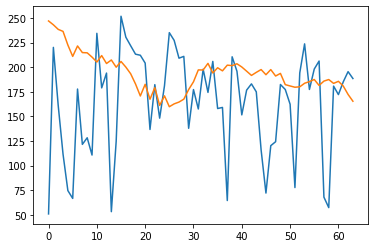

In [ ]:
plt.plot(act.iloc[:,-1:])
plt.plot(pred.iloc[:,-1:])
